In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def read_csv(filename: str) -> pd.DataFrame:
    df = pd.read_csv(filename, sep=';', decimal=',')
    return clean_df(df)

def clean_df(df: pd.DataFrame):
    df["students_norm"] = pd.Series((df["WO [x1000]"] / df["WO [x1000]"].abs().min()), dtype=float)
    df["consumed_norm"] = pd.Series((df["NL Beer consumption [x1000 hectoliter]"] / df["NL Beer consumption [x1000 hectoliter]"].abs().min()), dtype=float)
    return df

In [15]:
filename = "istherecorrelation.csv"
df = read_csv(filename)
df = clean_df(df)
df.head(10)

,Year,WO [x1000],NL Beer consumption [x1000 hectoliter],students_norm,consumed_norm
0,2006,205.9,11402,1.000000,1.000000
1,2007,208.6,11492,1.013113,1.007893
2,2008,212.7,11450,1.033026,1.004210
3,2009,220.5,11502,1.070908,1.008770
4,2010,233.2,11474,1.132589,1.006315
5,2011,242.4,11480,1.177271,1.006841
6,2012,245.4,11452,1.191841,1.004385
7,2013,241.4,11484,1.172414,1.007192
8,2014,250.2,11555,1.215153,1.013419
9,2015,255.7,11601,1.241865,1.017453


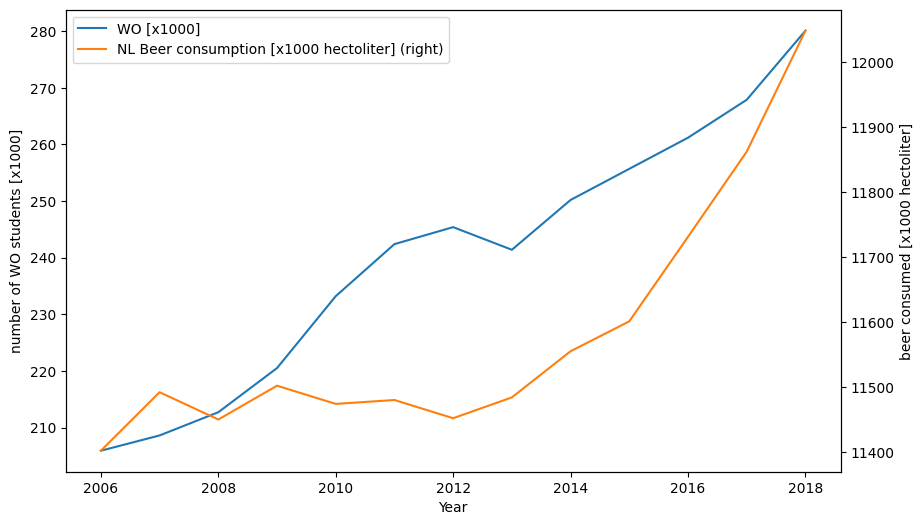

In [17]:

def plot_line(df: pd.DataFrame):
    fig = df[["Year", "WO [x1000]", "NL Beer consumption [x1000 hectoliter]"]].plot(
        x="Year",
        secondary_y=["NL Beer consumption [x1000 hectoliter]"]
        )
    fig.set_ylabel("N students [x1000]")
    fig.right_ax.set_ylabel("litres of beer consumed [x1000 hectoliter]")
    return fig

def plot(df: pd.DataFrame):
    fig = df[["Year", "WO [x1000]", "NL Beer consumption [x1000 hectoliter]"]].plot(
        x="Year",
        secondary_y=["NL Beer consumption [x1000 hectoliter]"],
        figsize=(10, 6)
        )
    fig.axes.set_xlabel("Year")
    fig.set_ylabel("number of WO students [x1000]")
    fig.right_ax.set_ylabel("beer consumed [x1000 hectoliter]")
    return fig

fig = plot(df)